<a href="https://colab.research.google.com/github/Riniii09/NLP-Mini-Project/blob/main/Text_Classification_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

### **Task 2 of Mini Project: Text Classification using Deep Learning**



In [ ]:
import tensorflow as tf
import numpy as np
print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)


TensorFlow version: 2.18.0
NumPy version: 1.26.4


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sheet1.csv to Sheet1.csv


In [ ]:
import pandas as pd
data = pd.read_csv("Sheet1.csv")

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Sheet1.csv")

# Display basic info
print(data.info())  # Check columns and missing values
print(data.head())  # Show first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sr.no       1640 non-null   int64 
 1   Statements  1640 non-null   object
 2   Category    1640 non-null   object
dtypes: int64(1), object(2)
memory usage: 38.6+ KB
None
   Sr.no                                         Statements    Category
0      1  The lender shall provide a grace period of 15 ...  Beneficial
1      2  The insured shall have the right to reinstate ...  Beneficial
2      3  The borrower may request an extension of the l...  Beneficial
3      4  Prepayment of the loan shall be allowed withou...  Beneficial
4      5  The insurer guarantees coverage for all pre-ex...  Beneficial


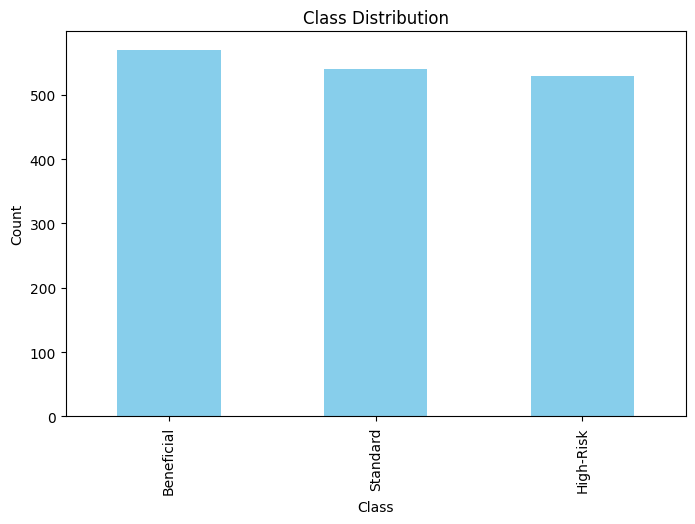

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

plt.figure(figsize=(8, 5))
data['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:

# Restart the kernel after running the above lines
# Then run the following
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("Sheet1.csv")

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [ ]:
import re
import nltk
nltk.data.path.append("/root/nltk_data")  # Ensure correct path
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

In [ ]:
import os
print(os.listdir(nltk.data.find("tokenizers")))


['punkt.zip', 'punkt']


In [ ]:
import re
import nltk
# nltk.data.path.append("/root/nltk_data")  # Remove this line or correct the path
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' resource
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply the preprocessing to the dataset, replacing 'text' with the correct column name
# Assuming 'Review' is the column with the text data, update accordingly
train_data['processed_text'] = train_data['Statements'].apply(preprocess_text)
val_data['processed_text'] = val_data['Statements'].apply(preprocess_text)
test_data['processed_text'] = test_data['Statements'].apply(preprocess_text)

# Check the processed text
print(train_data[['Statements', 'processed_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                             Statements  \
117   The borrower may qualify for interest rate red...   
421   The credit agreement allows users to set autom...   
1298  The parties agree to maintain confidentiality ...   
774   If a business fails to report taxable income, ...   
1486  Any delays in fulfilling obligations shall be ...   

                                         processed_text  
117   borrower may qualify interest rate reductions ...  
421   credit agreement allows users set automatic bi...  
1298  parties agree maintain confidentiality dispute...  
774   business fails report taxable income face fina...  
1486  delays fulfilling obligations shall promptly c...  


In [ ]:
# Install required libraries

# Import libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
import numpy as np

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(train_data['processed_text']).toarray()
X_val_bow = bow_vectorizer.transform(val_data['processed_text']).toarray()
X_test_bow = bow_vectorizer.transform(test_data['processed_text']).toarray()

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text']).toarray()
X_val_tfidf = tfidf_vectorizer.transform(val_data['processed_text']).toarray()
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text']).toarray()

# FastText (Word Embeddings)
fasttext_model = gensim.models.FastText(
    sentences=train_data['processed_text'].apply(str.split),
    vector_size=100, window=5, min_count=5, epochs=10
)

# Convert text to FastText embeddings (average word vectors for each sentence)
def get_sentence_embedding(text, model, vector_size=100):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Average word vectors
    else:
        return np.zeros(vector_size)  # Return zero vector if no words are in vocabulary

X_train_fasttext = np.array([get_sentence_embedding(text, fasttext_model) for text in train_data['processed_text']])
X_val_fasttext = np.array([get_sentence_embedding(text, fasttext_model) for text in val_data['processed_text']])
X_test_fasttext = np.array([get_sentence_embedding(text, fasttext_model) for text in test_data['processed_text']])

print("Embedding completed for BoW, TF-IDF, and FastText.")


Embedding completed for BoW, TF-IDF, and FastText.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

def cnn_model(input_dim):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,)),
        Dense(256, activation='relu'),
        Dense(3, activation='softmax')  # Ensure output units match the number of classes
    ])

    model.compile(optimizer=Adam(learning_rate=0.00005),
                  loss=CategoricalCrossentropy(label_smoothing=0.1),
                  metrics=['accuracy'])

    return model

input_dim = X_train_bow.shape[1]  # Should be 1657
cnn = cnn_model(input_dim)


In [ ]:
import numpy as np

X_train_bow = np.array(X_train_bow, dtype=np.float32)
X_val_bow = np.array(X_val_bow, dtype=np.float32)
y_train_one_hot = np.array(y_train_one_hot, dtype=np.float32)
y_val_one_hot = np.array(y_val_one_hot, dtype=np.float32)


In [ ]:
cnn.fit(X_train_bow, y_train_one_hot, validation_data=(X_val_bow, y_val_one_hot),
        epochs=20, batch_size=64, callbacks=[early_stopping])


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4984 - loss: 1.0845 - val_accuracy: 0.6894 - val_loss: 1.0612
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7318 - loss: 1.0532 - val_accuracy: 0.8030 - val_loss: 1.0362
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8419 - loss: 1.0227 - val_accuracy: 0.8864 - val_loss: 1.0075
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9237 - loss: 0.9819 - val_accuracy: 0.9091 - val_loss: 0.9731
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9464 - loss: 0.9384 - val_accuracy: 0.9015 - val_loss: 0.9316
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9578 - loss: 0.8946 - val_accuracy: 0.9394 - val_loss: 0.8833
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9625 - loss: 0.8335 - val_accuracy: 0.9545 - val_loss: 0.8271
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9647 - loss: 0.7754 - val_accuracy: 0.9470 - v

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode actual labels into numerical form
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)  # Convert string labels to numbers

# Print mapping for debugging
print("Label Encoding Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Compute accuracy and classification report
cnn_acc = accuracy_score(y_true_encoded, y_pred_cnn_classes)
print("CNN Accuracy:", cnn_acc)
print("CNN Classification Report:\n", classification_report(y_true_encoded, y_pred_cnn_classes))


Label Encoding Mapping: {'Beneficial': 0, 'High-Risk': 1, 'Standard': 2}
CNN Accuracy: 0.9725609756097561
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       128
           1       0.97      0.97      0.97       103
           2       0.97      0.98      0.97        97

    accuracy                           0.97       328
   macro avg       0.97      0.97      0.97       328
weighted avg       0.97      0.97      0.97       328



In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Bidirectional, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load Dataset
df = pd.read_csv("Sheet1.csv")  # Ensure this file contains 'processed_text' and 'Category'
df['label'] = df['Category'].astype('category').cat.codes  # Convert labels to numeric

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Statements'], df['label'], test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_length = max(len(seq) for seq in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding="post")

# Convert labels to categorical
num_classes = len(df['label'].unique())
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Feature Extraction (BoW, TF-IDF)
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train).toarray()
X_test_bow = vectorizer_bow.transform(X_test).toarray()

vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer_tfidf.transform(X_test).toarray()

# Model Definitions
def create_cnn_model(input_dim):
    model = Sequential([
        Embedding(input_dim, 128, input_length=max_length),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_lstm_model(input_dim):
    model = Sequential([
        Embedding(input_dim, 128, input_length=max_length),
        LSTM(128),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_bilstm_model(input_dim):
    model = Sequential([
        Embedding(input_dim, 128, input_length=max_length),
        Bidirectional(LSTM(128)),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn_bilstm_model(input_dim):
    model = Sequential([
        Embedding(input_dim, 128, input_length=max_length),
        Conv1D(128, 5, activation='relu'),
        Bidirectional(LSTM(128)),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize Models
input_dim = len(tokenizer.word_index) + 1
cnn = create_cnn_model(input_dim)
lstm = create_lstm_model(input_dim)
bilstm = create_bilstm_model(input_dim)
cnn_bilstm = create_cnn_bilstm_model(input_dim)

# Train Models
models = {"CNN": cnn, "LSTM": lstm, "BiLSTM": bilstm, "CNN-BiLSTM": cnn_bilstm}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_padded, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test_cat))

# Evaluation Function
def evaluate_model(model, X_test, y_test, model_name, embedding_name):
    start_time = time.time()
    y_pred = model.predict(X_test_padded)
    y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot to labels
    inference_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    return {
        "Model": model_name,
        "Embedding": embedding_name,
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"],
        "Inference Time (s)": round(inference_time, 4),
    }

# Evaluate Models on Different Embeddings
results = []
for name, model in models.items():
    results.append(evaluate_model(model, X_test_padded, y_test, name, "Word Embeddings"))
    results.append(evaluate_model(model, X_test_bow, y_test, name, "BoW"))
    results.append(evaluate_model(model, X_test_tfidf, y_test, name, "TF-IDF"))

# Convert to DataFrame and Display
df_results = pd.DataFrame(results)
print(df_results)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training CNN...
Epoch 1/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5532 - loss: 0.9691 - val_accuracy: 0.9299 - val_loss: 0.2520
Epoch 2/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9662 - loss: 0.1361 - val_accuracy: 0.9726 - val_loss: 0.0988
Epoch 3/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9961 - loss: 0.0230 - val_accuracy: 0.9756 - val_loss: 0.0785
Epoch 4/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9984 - loss: 0.0092 - val_accuracy: 0.9817 - val_loss: 0.0789
Epoch 5/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9756 - val_loss: 0.0824
Training LSTM...
Epoch 1/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.4772 - loss: 0.9984 - val_accuracy: 0.9512 - val_loss: 0.1888
Epoch 2/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9752 - loss: 0.0944 - val_accuracy: 0.9665 - val_loss: 0.1065
Epoch 3/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9851 - loss: 0.0536 -

In [ ]:
import tensorflow as tf

# Find the best model based on Accuracy
best_model_entry = comparison_df.loc[comparison_df["Accuracy"].idxmax()]
best_model_name = best_model_entry["Model"]

# Map model names to actual objects
# Assuming you have initialized the models like this:
input_dim = len(tokenizer.word_index) + 1 # Make sure input_dim is defined
cnn_model = create_cnn_model(input_dim)
lstm_model = create_lstm_model(input_dim)
bilstm_model = create_bilstm_model(input_dim)
cnn_bilstm_model = create_cnn_bilstm_model(input_dim)

model_dict = {
    "CNN": cnn_model, # Use the initialized model objects
    "LSTM": lstm_model,
    "BiLSTM": bilstm_model,
    "CNN-BiLSTM": cnn_bilstm_model
}

# Get the best model object
best_model = model_dict[best_model_name]

# Save the best model
best_model.save("best_text_classification_model.h5")
print(f"Best model '{best_model_name}' saved as 'best_text_classification_model.h5'")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Best model 'LSTM' saved as 'best_text_classification_model.h5'


In [ ]:
from keras.models import load_model
import numpy as np

# Load the saved model
model = load_model('best_text_classification_model.h5', compile=False)

# Define class labels mapping
label_mapping = {0: 'Beneficial', 1: 'High-Risk', 2: 'Standard'}

# Function to preprocess real-world input
def preprocess_text(text):
    # Add your text preprocessing steps (lowercasing, stopword removal, tokenization, etc.)
    text = text.lower()
    return text

# Real-world input (change this to test different inputs)
new_text = "Any breach of ethical policies will result in termination without compensation.  "

# Preprocess the input text
processed_text = preprocess_text(new_text)

# Convert text to appropriate feature representation (BoW, TF-IDF, or Word Embeddings)
input_data = bow_vectorizer.transform([processed_text]).toarray()  # Change based on embedding used

# Predict class probabilities
pred_probs = model.predict(input_data)

# Get the predicted class and confidence score
predicted_class = np.argmax(pred_probs, axis=1)[0]  # Get class index
confidence_score = np.max(pred_probs)  # Get probability of the predicted class

# Get predicted category name
predicted_category = label_mapping[predicted_class]

# Print the prediction
print(f"Predicted Category: {predicted_category}")
print(f"Confidence Score: {confidence_score:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Category: High-Risk
Confidence Score: 0.3452
